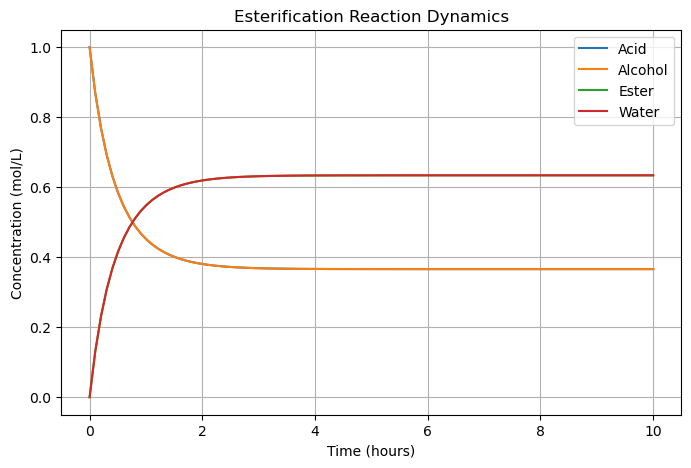

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Esterification reaction rate
def esterification(y, t, k1, k2):
    acid, alcohol, ester, water = y
    rate_formation = k1 * acid * alcohol - k2 * ester * water
    return [
        -rate_formation,  # d[acid]/dt
        -rate_formation,  # d[alcohol]/dt
        rate_formation,   # d[ester]/dt
        rate_formation    # d[water]/dt
    ]

# Initial concentrations (mol/L)
y0 = [1.0, 1.0, 0.0, 0.0]  # Acid, Alcohol, Ester, Water
t = np.linspace(0, 10, 100)
k1, k2 = 1.5, 0.5  # Reaction rate constants

# Solve the system of ODEs
results = odeint(esterification, y0, t, args=(k1, k2))
acid, alcohol, ester, water = results.T

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(t, acid, label="Acid")
plt.plot(t, alcohol, label="Alcohol")
plt.plot(t, ester, label="Ester")
plt.plot(t, water, label="Water")
plt.xlabel("Time (hours)")
plt.ylabel("Concentration (mol/L)")
plt.legend()
plt.title("Esterification Reaction Dynamics")
plt.grid()
plt.show()


In [3]:
from graphviz import Digraph

# Initialize the Digraph
flowchart = Digraph(format='png', engine='dot')
flowchart.attr(rankdir='LR', size='10,5')  # Horizontal layout

# Define nodes
flowchart.node("A", "Raw Materials\n(Organic & Inorganic Chemicals)", shape="ellipse", style="filled", color="lightblue")
flowchart.node("B", "Esterification\nReactor", shape="box", style="rounded, filled", color="lightgray")
flowchart.node("C", "Hydrolysis\nReactor", shape="box", style="rounded, filled", color="lightgray")
flowchart.node("D", "Crystallizer", shape="box", style="rounded, filled", color="lightgray")
flowchart.node("E", "API\n(Product)", shape="ellipse", style="filled", color="lightgreen")
flowchart.node("F", "Waste Streams", shape="ellipse", style="filled", color="lightcoral")

# Add edges
flowchart.edge("A", "B", label="Reactants")
flowchart.edge("B", "C", label="Ester")
flowchart.edge("C", "D", label="Hydrolyzed Intermediate")
flowchart.edge("D", "E", label="Purified API")
flowchart.edge("D", "F", label="Spent Solvent & Impurities")

# Recycle Streams
flowchart.edge("F", "B", label="Recycle Solvent", style="dashed")

# Save and render
flowchart.render("pharmaceutical_synthesis_flowchart", cleanup=True)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH